In [6]:
from qiskit import IBMQ

IBMQ.save_account('dbb63abf5cae34045d60c50e94eedd65ab328a642e2eaa27a88fa32bb2da41d05c59859204625ab690d988f286a4e06cfca28d06f4a555056513517ff3f9d429')



configrc.store_credentials:WARNING:2021-11-07 01:20:58,492: Credentials already present. Set overwrite=True to overwrite.


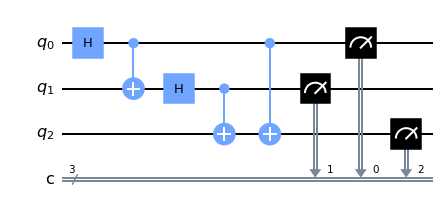

In [7]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister,QuantumCircuit,execute,Aer
from qiskit.tools.visualization import circuit_drawer,plot_histogram
from numpy import pi



qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
for i in range(3):
    circuit.measure(qreg_q[i],creg_c[i])

#シミュレーターの指定, select the simulator
simulator = Aer.get_backend('qasm_simulator')
#量子回路のシミュレーターを使った実行, Repeat circuit= #(shots) times
job = execute(circuit, simulator, shots=1000)

#測定結果の取り出し
result = job.result()
counts = result.get_counts(circuit)

circuit.draw(output='mpl')

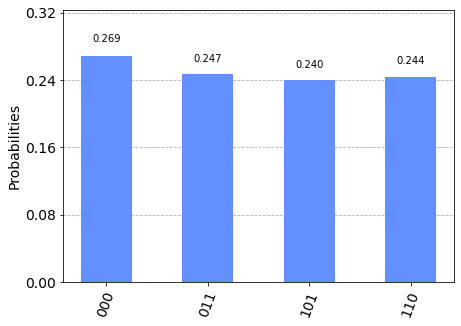

In [8]:
# Entanglement test 
plot_histogram(counts)

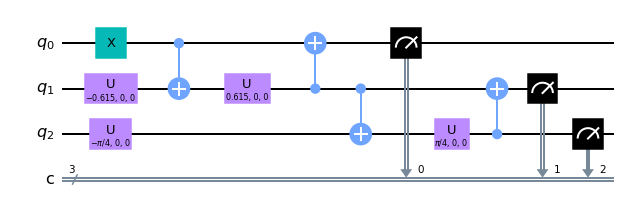

In [4]:


qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.u(-0.615, 0, 0, qreg_q[1])
circuit.u(-pi/4, 0, 0, qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.u(0.615, 0, 0, qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.u(pi/4, 0, 0, qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])

for i in range(3):
    circuit.measure(qreg_q[i],creg_c[i])

#シミュレーターの指定, select the simulator
simulator = Aer.get_backend('qasm_simulator')
#量子回路のシミュレーターを使った実行, Repeat circuit= #(shots) times
job = execute(circuit, simulator, shots=1000)

#測定結果の取り出し
result = job.result()
counts = result.get_counts(circuit)

circuit.draw(output='mpl')



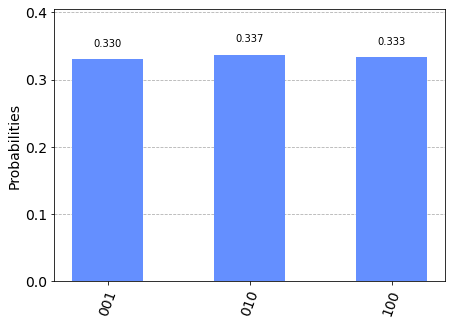

In [13]:
# Entanglement test
plot_histogram(counts)